In [13]:
# 多输出的神经网络
# 比如不仅要预测当前的房间，还要预测一个月后的房价
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [14]:
# 获取房价数据集
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# print(housing.DESCR)
# print(housing.data.shape)    # X
# print(housing.target.shape)  # Y

In [15]:
# 拆分训练集、验证集和测试集
from sklearn.model_selection import train_test_split
# 默认按照3:1进行拆分，可设置test_size参数进行改变，其默认为0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7, test_size = 0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [16]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.transform(x_valid)
x_test_scaler = scaler.transform(x_test)

In [17]:
# 多输入
# 一共有8个特征，前5个给wide, 后6个给deep
input_wide = keras.layers.Input(shape = [5])
input_deep = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
# 多输出
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep], outputs = [output, output2])
# 打印一下模型的信息
model.summary()
# 均方差 随机梯度下降
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

In [18]:
x_train_scaled_wide = x_train_scaler[:, :5]
x_train_scaled_deep = x_train_scaler[:, 2:]
x_valid_scaled_wide = x_valid_scaler[:, :5]
x_valid_scaled_deep = x_valid_scaler[:, 2:]
x_test_scaler_wide = x_test_scaler[:, :5]
x_test_scaler_deep = x_test_scaler[:, 2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train], 
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                   epochs = 100, callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 162us/sample - loss: 3.4348 - dense_5_loss: 1.9253 - dense_6_loss: 1.5085 - val_loss: 1.6306 - val_dense_5_loss: 0.8148 - val_dense_6_loss: 0.8157
Epoch 2/100
11610/11610 [==============================] - 1s 79us/sample - loss: 1.2384 - dense_5_loss: 0.5938 - dense_6_loss: 0.6445 - val_loss: 1.1295 - val_dense_5_loss: 0.5240 - val_dense_6_loss: 0.6053
Epoch 3/100
11610/11610 [==============================] - 1s 78us/sample - loss: 1.0288 - dense_5_loss: 0.4695 - dense_6_loss: 0.5591 - val_loss: 1.0307 - val_dense_5_loss: 0.4700 - val_dense_6_loss: 0.5605
Epoch 4/100
11610/11610 [==============================] - 2s 135us/sample - loss: 0.9501 - dense_5_loss: 0.4275 - dense_6_loss: 0.5224 - val_loss: 0.9562 - val_dense_5_loss: 0.4316 - val_dense_6_loss: 0.5244
Epoch 5/100
11610/11610 [==============================] - 1s 112us/sample - loss: 0.9039 - dense_5_loss: 0.4040 - de

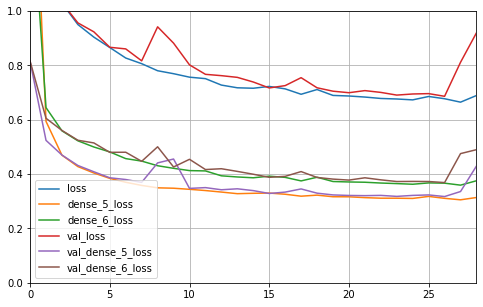

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [20]:
# 用测试集进行模型的评估    .返回损失值&模型的度量值
model.evaluate([x_test_scaler_wide, x_test_scaler_deep], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7518997486247573, 0.35445753, 0.39957038]